In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import constants as const
from astropy.io import fits
from scipy.ndimage import rotate
from numpy import flip
from astropy.cosmology import Planck18

In [13]:
KtokeV = const.k_B.value / const.e.value * 1e-3

# Select cluster

In [14]:
clust_number = 282
snap_number = 107

r200_frac = 2

In [15]:
r500 = fits.getheader(f'/home2/ferragamo/NIKA2_300_TS/Raphael_maps/Xray_theoretical_maps_CL{clust_number:04d}_snap_{snap_number:03d}_proj_0.fits', ext=1)['R500']
r200 = fits.getheader(f'/home2/ferragamo/NIKA2_300_TS/Raphael_maps/Xray_theoretical_maps_CL{clust_number:04d}_snap_{snap_number:03d}_proj_0.fits', ext=1)['R200']
z = fits.getheader(f'/home2/ferragamo/NIKA2_300_TS/Raphael_maps/Xray_theoretical_maps_CL{clust_number:04d}_snap_{snap_number:03d}_proj_0.fits', ext=1)['REDSHIFT']
r500, r200, z

(1079.6435089526487, 1591.0, 0.5923186540603638)

In [16]:
if clust_number == 9:
    pos = [500449.25180608, 498686.08206418, 500729.06224462]
elif clust_number == 282:
    pos = [500343.38414223, 499741.95046021, 500053.4596685 ]

In [17]:
x_bounds = [pos[0]-r200_frac*r200, pos[0]+r200_frac*r200]
y_bounds = [pos[1]-r200_frac*r200, pos[1]+r200_frac*r200]
z_bounds = [pos[2]-r200_frac*r200, pos[2]+r200_frac*r200]

print(x_bounds)
print(y_bounds)
print(z_bounds)

[497161.38414223, 503525.38414223]
[496559.95046021, 502923.95046021]
[496871.4596685, 503235.4596685]


# Process and analyse SPLASH results

In [18]:
with open(f"/data7/NIKA2-300th/rwicker/splash_tests/cl{clust_number:04d}_snap{snap_number:03d}.gridstream", "rb") as file:
   nx, ny, nz, ncolumns = np.fromfile(file, dtype=np.int32, count=4)
   time, xmin, xmax, ymin, ymax, zmin, zmax = np.fromfile(file, dtype=np.float64, count=7)
   rho = np.fromfile(file, dtype=np.float64, count=nx * ny * nz)
   mass = np.fromfile(file, dtype=np.float64, count=nx * ny * nz)
   N_e = np.fromfile(file, dtype=np.float64, count=nx * ny * nz)
   Z = np.fromfile(file, dtype=np.float64, count=nx * ny * nz)
   temp = np.fromfile(file, dtype=np.float64, count=nx * ny * nz)
   pressure = np.fromfile(file, dtype=np.float64, count=nx * ny * nz)

In [19]:
print(nx, ny, nz, ncolumns, time, xmin, xmax, ymin, ymax, zmin, zmax)

636 636 636 5 0.6280149941737094 497161.4 503525.4 496560.0 502924.0 496871.5 503235.5


In [20]:
bin_size = 2*r200_frac*r200/nx
print(bin_size)

10.0062893081761


In [21]:
mass_cube = mass.reshape((nx, ny, nz))
temp_cube = temp.reshape((nx, ny, nz))*KtokeV
Z_cube = Z.reshape((nx, ny, nz))
density_cube = rho.reshape((nx, ny, nz))
abundance_cube = N_e.reshape((nx, ny, nz))
#pressure_cube = pressure.reshape((nx, ny, nz))

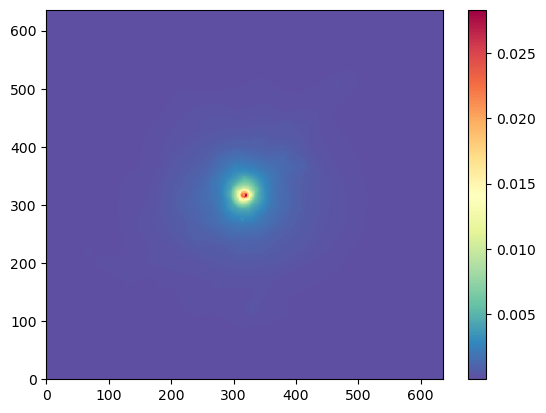

In [22]:
rhomap = plt.pcolormesh(np.sum(density_cube, axis=2)*bin_size, cmap='Spectral_r')#, vmin=1., vmax=10**4.5)
plt.colorbar(rhomap)

np.save(f'/data7/NIKA2-300th/rwicker/splash_density_maps/ne_map_CL{clust_number:04d}_snap{snap_number:03d}.npy', np.sum(density_cube, axis=2)*bin_size)

In [13]:
#pressure_map = plt.pcolormesh(np.mean(pressure_cube, axis=2), cmap='Spectral_r')
#plt.colorbar(pressure_map)

(array([       0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0

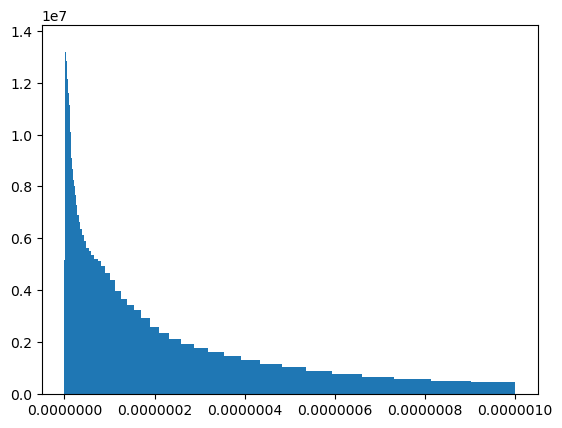

In [14]:
plt.hist(rho, bins=np.logspace(-15, -6, 200))

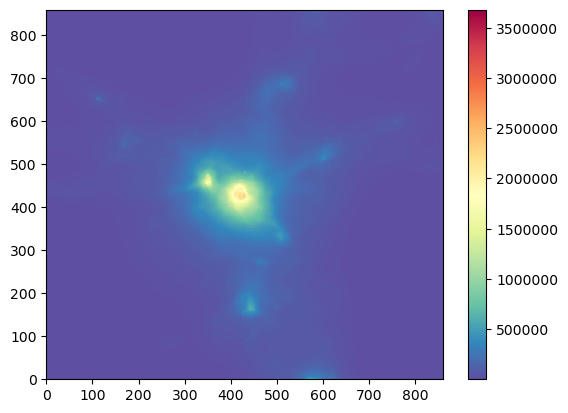

In [15]:
mass_map = plt.pcolormesh(np.sum(mass_cube*1e10*density_cube, axis=2)*bin_size, cmap="Spectral_r")
plt.colorbar(mass_map)

(array([2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 4.00000000e+00,
        5.00000000e+00, 5.00000000e+00, 9.00000000e+00, 5.00000000e+00,
        2.00000000e+00, 6.00000000e+00, 1.70000000e+01, 2.60000000e+01,
        3.10000000e+01, 5.20000000e+01, 6.20000000e+01, 9.50000000e+01,
        1.08000000e+02, 1.59000000e+02, 2.19000000e+02, 3.25000000e+02,
        4.38000000e+02, 6.17000000e+02, 8.19000000e+02, 2.18400000e+03,
        1.16120000e+04, 2.01840000e+04, 4.75370000e+04, 8.72730000e+04,
        1.46982000e+05, 2.66423000e+05, 5.05759000e+05, 1.11233000e+06,
        2.71793200e+06, 6.96648300e+06, 1.93376100e+07, 5.46392490e+07,
        1.41588545e+08, 3.99407334e+08, 7.33073300e+06, 9.76714000e+05,
        3.28253000e+05, 1.46948000e+05, 8.47910000e+04, 5.35520000e+04,
        3.75260000e+04, 2.28000000e+04, 1.71320000e+04, 1.46190000e+04,
        1.26380000e+04, 1.09330000e+04, 9.55800000e+03, 8.62800000e+03,
        7.83600000e+03, 7.08400000e+03, 6.54600000e+03, 6.032000

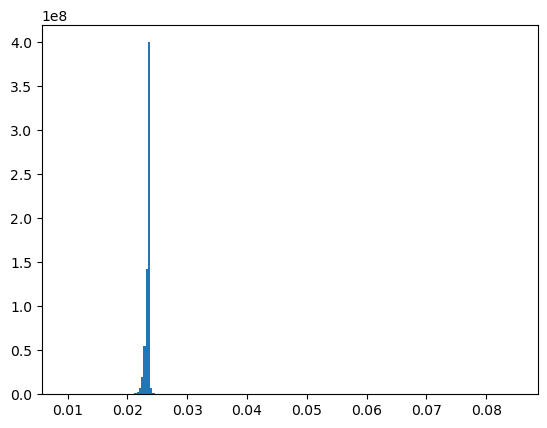

In [16]:
plt.hist(mass, bins=200)

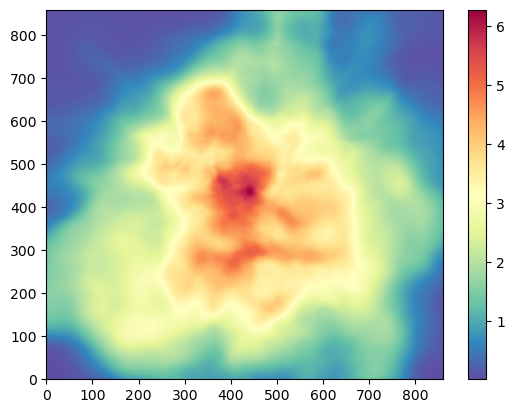

In [17]:
theo_temp = np.mean(temp_cube, axis=2)
Tmap = plt.pcolormesh(theo_temp, cmap='Spectral_r')#, vmin=1., vmax=10**4.5)
plt.colorbar(Tmap)

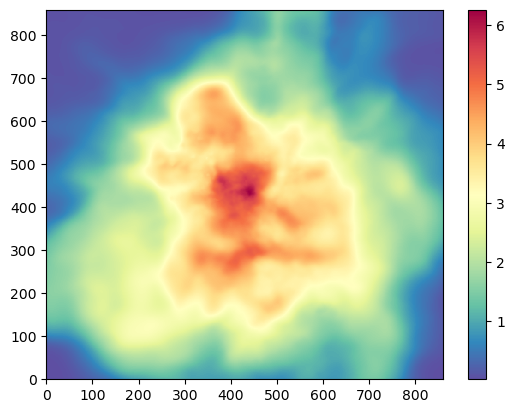

In [18]:
mw_temp = np.sum(mass_cube*temp_cube*bin_size, axis=2)/np.sum(mass_cube*bin_size, axis=2)
Tmw_map = plt.pcolormesh(mw_temp, cmap='Spectral_r')#, vmin=1., vmax=10**4.5)
plt.colorbar(Tmw_map)

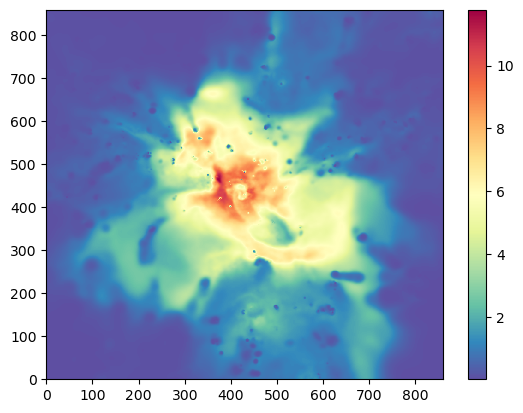

In [19]:
weight_cube = density_cube**2/(temp_cube)**(3/4)
sl_temp = np.sum(temp_cube*weight_cube*bin_size, axis=2)/np.sum(weight_cube*bin_size, axis=2)
T_sl_map = plt.pcolormesh(sl_temp, cmap="Spectral_r")
plt.colorbar(T_sl_map)

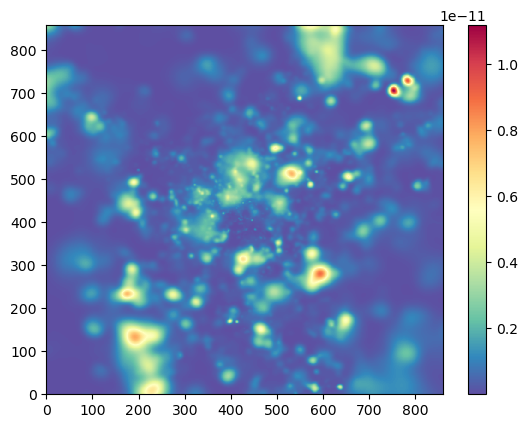

In [20]:
Zmap = plt.pcolormesh(np.sum(Z_cube, axis=2)*bin_size, cmap='Spectral_r')#, vmin=1., vmax=10**4.5)
plt.colorbar(Zmap)

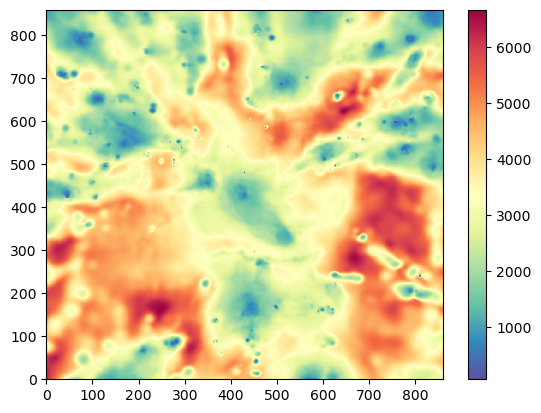

In [21]:
test_leff = np.sum(density_cube*bin_size, axis=2)**2/np.sum(density_cube**2*bin_size, axis=2)
test_leff_map = plt.pcolormesh(test_leff, cmap='Spectral_r')#, vmin=1., vmax=10**4.5)
plt.colorbar(test_leff_map)

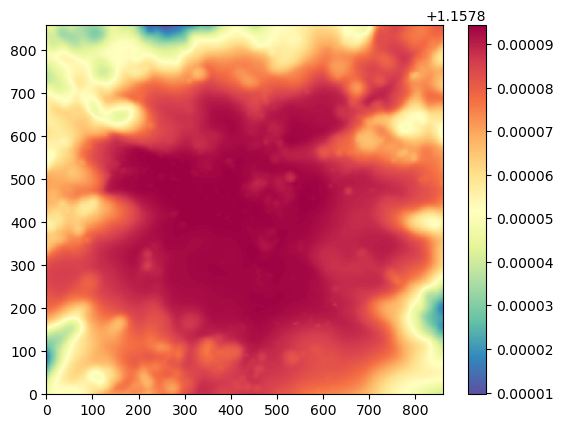

In [22]:
abundance_map = plt.pcolormesh(np.mean(abundance_cube, axis=2), cmap='Spectral_r')#, vmin=1., vmax=10**4.5)
plt.colorbar(abundance_map)

In [23]:
np.save(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_Ttheo_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy', theo_temp)
np.save(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_Tmw_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy', mw_temp)
np.save(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_Tsl_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy', sl_temp)
np.save(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_leff_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy', test_leff)

# Comparison between SPLASH and Weiguang's SPH maps

In [24]:
Weiguang_Ttheo = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/Weiguang_SPH_Ttheo_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')
Weiguang_Tmw = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/Weiguang_SPH_Tmw_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')
Weiguang_Tsl = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/Weiguang_SPH_Tsl_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')
Weiguang_leff = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/Weiguang_SPH_leff_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')

splash_Ttheo = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_Ttheo_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')
splash_Tmw = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_Tmw_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')
splash_Tsl = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_Tsl_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')
splash_leff = np.load(f'/data7/NIKA2-300th/rwicker/comparison_maps_SPLASH_v_Weiguang_SPH/SPLASH_leff_map_CL{clust_number:04d}_snap_{snap_number:03d}.npy')

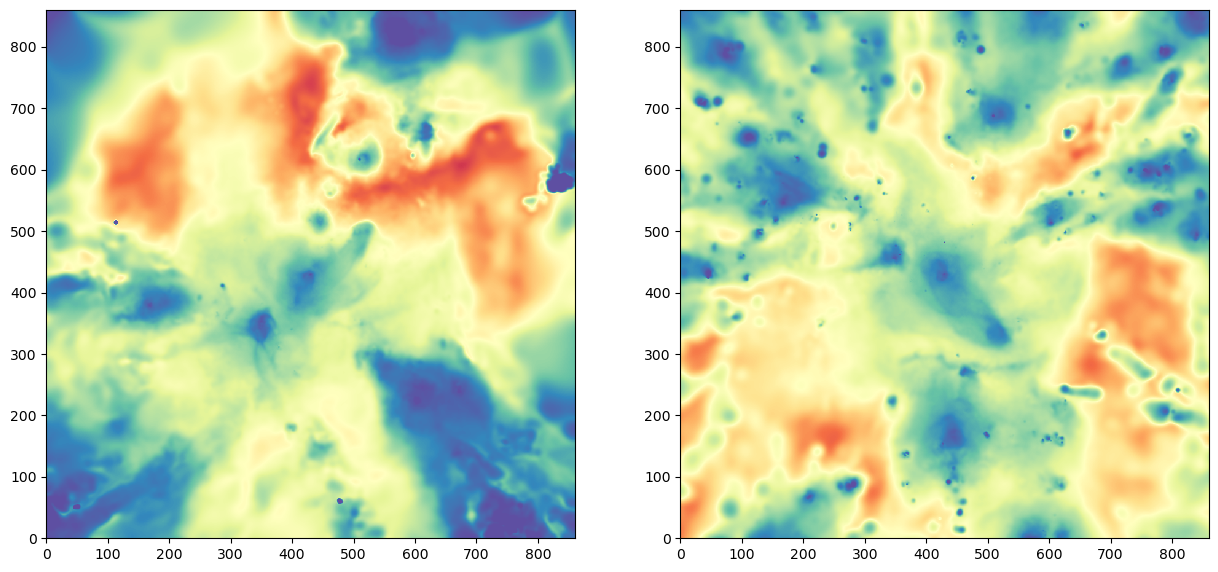

In [25]:
fig = plt.figure(figsize=(15, 7))

ax = fig.add_subplot(121, aspect='equal')
ax.pcolormesh(Weiguang_leff, cmap="Spectral_r", vmin=500, vmax=8000)

ax1 = fig.add_subplot(122, aspect='equal')
ax1.pcolormesh(splash_leff, cmap='Spectral_r', vmin=500, vmax=8000)

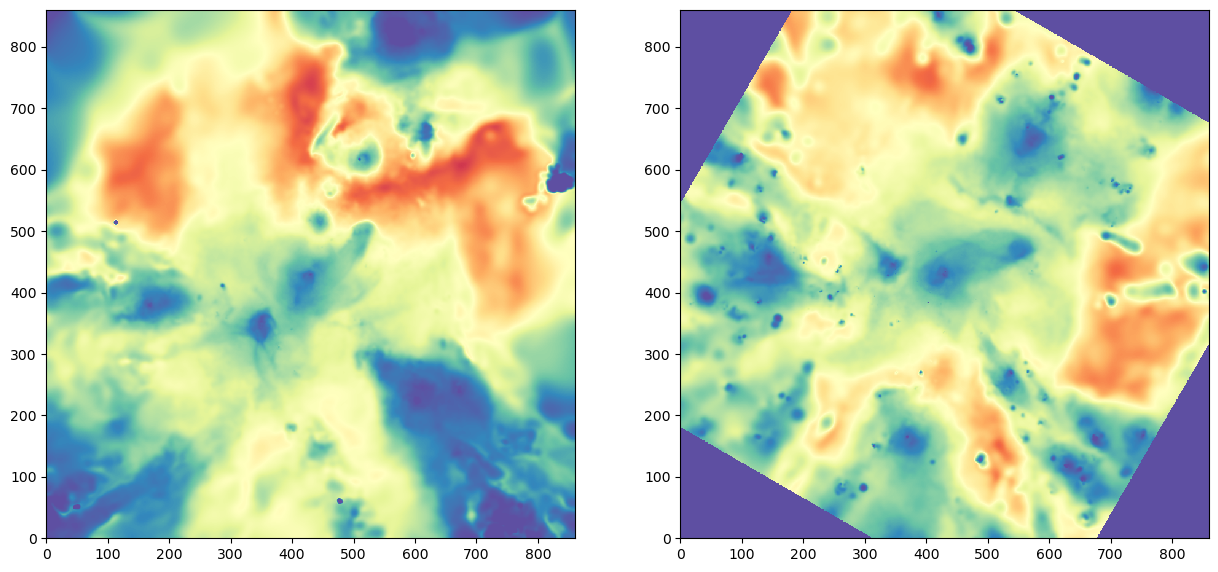

In [26]:
fig = plt.figure(figsize=(15, 7))

ax = fig.add_subplot(121, aspect='equal')
ax.pcolormesh(Weiguang_leff, cmap="Spectral_r", vmin=500, vmax=8000)

ax1 = fig.add_subplot(122, aspect='equal')
ax1.pcolormesh(flip(rotate(splash_leff, 150, reshape=False), axis=1), cmap='Spectral_r', vmin=500, vmax=8000)

In [27]:
comparison_Ttheo = (flip(rotate(splash_Ttheo, 150, reshape=False), axis=1) - Weiguang_Ttheo)/flip(rotate(splash_Ttheo, 150, reshape=False), axis=1)
comparison_Tmw = (flip(rotate(splash_Tmw, 150, reshape=False), axis=1) - Weiguang_Tmw)/flip(rotate(splash_Tmw, 150, reshape=False), axis=1)
comparison_Tsl = (flip(rotate(splash_Tsl, 150, reshape=False), axis=1) - Weiguang_Tsl)/flip(rotate(splash_Tsl, 150, reshape=False), axis=1)
comparison_leff = (flip(rotate(splash_leff, 150, reshape=False), axis=1) - Weiguang_leff)/flip(rotate(splash_leff, 150, reshape=False), axis=1)

/tmp/ipykernel_4098527/1241895141.py:4: RuntimeWarning: divide by zero encountered in divide
  comparison_leff = (flip(rotate(splash_leff, 150, reshape=False), axis=1) - Weiguang_leff)/flip(rotate(splash_leff, 150, reshape=False), axis=1)


In [28]:
pix_size_arcmin = bin_size/Planck18.kpc_proper_per_arcmin(z).value

In [29]:
x, y = np.meshgrid(np.linspace(-pix_size_arcmin * len(splash_leff)//2, pix_size_arcmin * len(splash_leff)//2+1, len(splash_leff)),
                   np.linspace(-pix_size_arcmin * len(splash_leff)//2, pix_size_arcmin * len(splash_leff)//2+1, len(splash_leff)))
r500_arcmin = r500/Planck18.kpc_proper_per_arcmin(z).value
r200_arcmin = r200/Planck18.kpc_proper_per_arcmin(z).value

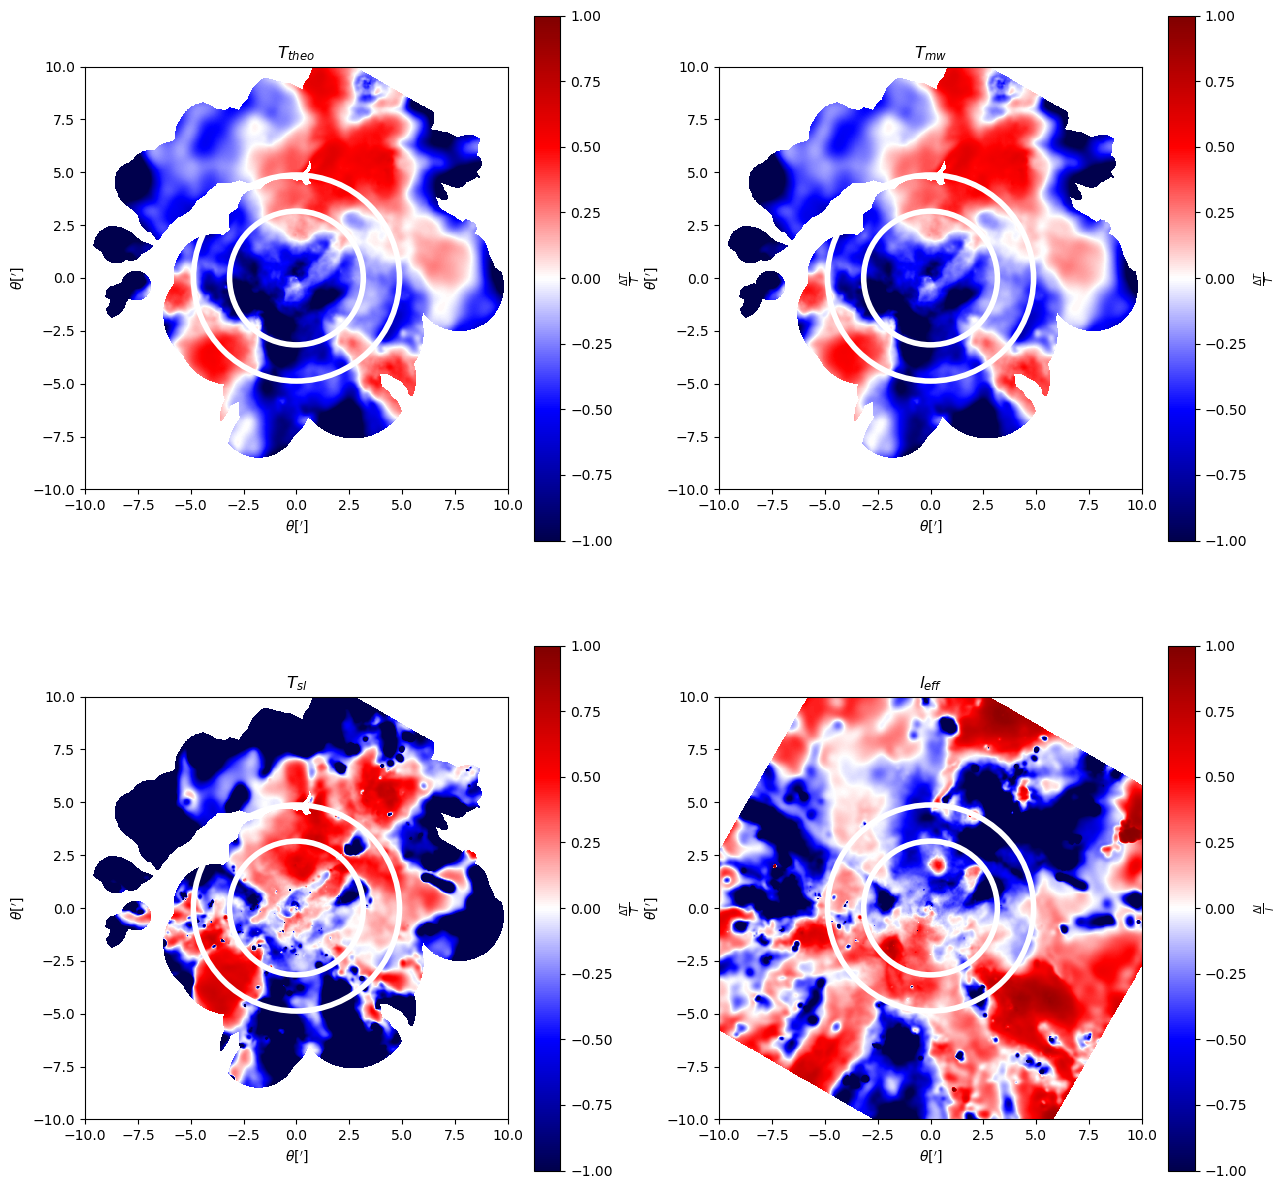

In [30]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221, aspect='equal')
comparison_Ttheo_map = ax.pcolormesh(x, y, comparison_Ttheo, cmap='seismic', vmin=-1, vmax=1)
circle_r500 = plt.Circle((0., 0.), r500_arcmin, fill=False, lw=4, color='w')
circle_r200 = plt.Circle((0., 0.), r200_arcmin, fill=False, lw=4, color='w')
ax.add_artist(circle_r500)
ax.add_artist(circle_r200)
ax.set_xlabel(r"$\theta [']$")
ax.set_ylabel(r"$\theta [']$")
ax.set_title('$T_{theo}$')
plt.colorbar(comparison_Ttheo_map, label=r'$\frac{\Delta T}{T}$')

ax1 = fig.add_subplot(222, aspect='equal')
comparison_Tmw_map = ax1.pcolormesh(x, y, comparison_Tmw, cmap='seismic', vmin=-1, vmax=1)
circle_r500 = plt.Circle((0., 0.), r500_arcmin, fill=False, lw=4, color='w')
circle_r200 = plt.Circle((0., 0.), r200_arcmin, fill=False, lw=4, color='w')
ax1.add_artist(circle_r500)
ax1.add_artist(circle_r200)
ax1.set_xlabel(r"$\theta [']$")
ax1.set_ylabel(r"$\theta [']$")
ax1.set_title('$T_{mw}$')
plt.colorbar(comparison_Tmw_map, label=r'$\frac{\Delta T}{T}$')

ax2 = fig.add_subplot(223, aspect='equal')
comparison_Tsl_map = ax2.pcolormesh(x, y, comparison_Tsl, cmap='seismic', vmin=-1, vmax=1)
circle_r500 = plt.Circle((0., 0.), r500_arcmin, fill=False, lw=4, color='w')
circle_r200 = plt.Circle((0., 0.), r200_arcmin, fill=False, lw=4, color='w')
ax2.add_artist(circle_r500)
ax2.add_artist(circle_r200)
ax2.set_xlabel(r"$\theta [']$")
ax2.set_ylabel(r"$\theta [']$")
ax2.set_title('$T_{sl}$')
plt.colorbar(comparison_Tsl_map, label=r'$\frac{\Delta T}{T}$')

ax3 = fig.add_subplot(224, aspect='equal')
comparison_leff_map = ax3.pcolormesh(x, y, comparison_leff, cmap='seismic', vmin=-1, vmax=1)
circle_r500 = plt.Circle((0., 0.), r500_arcmin, fill=False, lw=4, color='w')
circle_r200 = plt.Circle((0., 0.), r200_arcmin, fill=False, lw=4, color='w')
ax3.add_artist(circle_r500)
ax3.add_artist(circle_r200)
ax3.set_xlabel(r"$\theta [']$")
ax3.set_ylabel(r"$\theta [']$")
ax3.set_title('$l_{eff}$')
plt.colorbar(comparison_leff_map, label=r'$\frac{\Delta l}{l}$')